In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 1: Load Data

In [2]:
df=pd.read_csv("datasets/breast_cancer.csv").iloc[:175,1:-1].dropna()
df["diagnosis"]=df.loc[:,"diagnosis"].map({"M":1,"B":0})
diag=df["diagnosis"]
df=(df-df.mean())/df.std()
df["diagnosis"]=diag
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.083702,-2.231586,1.245739,1.027068,1.256223,2.790522,2.251679,2.281608,1.726828,...,1.810795,-1.415697,2.211857,2.040957,1.018033,2.112824,1.735442,2.036130,2.009174,1.420815
1,1,1.839057,-0.281547,1.673748,2.025180,-1.174206,-0.666906,-0.224156,0.322962,-0.260435,...,1.728662,-0.353253,1.437587,1.922944,-0.670180,-0.571528,-0.337636,0.843781,-0.441329,0.037193
2,1,1.581416,0.636739,1.550855,1.647433,0.620817,0.745190,1.059051,1.792774,0.580960,...,1.429614,0.017205,1.248521,1.460259,0.235476,0.761682,0.582752,1.699749,0.701180,-0.029488
3,1,-0.839817,0.407167,-0.670554,-0.861359,2.996370,2.900000,1.570012,1.214829,2.309584,...,-0.394157,0.186707,-0.360940,-0.677649,3.110714,3.237562,1.625242,1.917496,4.705919,3.925969
4,1,1.757080,-1.186640,1.766978,1.936117,-0.050692,0.274260,1.066019,1.191915,-0.270257,...,1.212699,-1.531028,1.239518,1.209247,-0.072272,-0.468413,0.360590,0.490881,-0.952347,-0.529592


#### 2: Visualize data

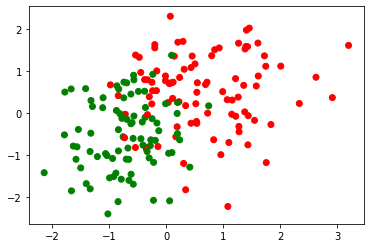

In [3]:
x=df["radius_mean"]
y=df["texture_mean"]
plt.scatter(x,y,c=df["diagnosis"].map({0:"green",1:"red"}))

#### Example 1

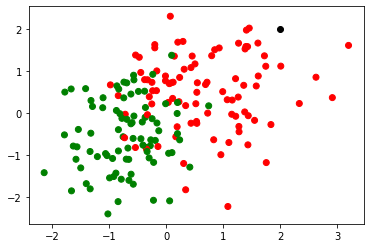

In [4]:
plt.scatter(x,y,c=df["diagnosis"].map({0:"green",1:"red"}))
plt.plot(2,2,"ko")

In [5]:
k=10
distances=pd.Series(((2-x)**2+(2-y)**2)**0.5,name="Distance")
knn=pd.concat([distances,df["diagnosis"]],axis=1).sort_values(by="Distance").iloc[:k,:]
knn.head(10)

,Distance,diagnosis
129,0.518235,1
33,0.541734,1
83,0.592258,1
78,0.701705,1
12,0.712564,1
42,0.734701,1
87,0.781122,1
30,0.806318,1
23,0.891003,1
95,0.928337,1


10 malignos y 0 benignos
Claramente es maligno


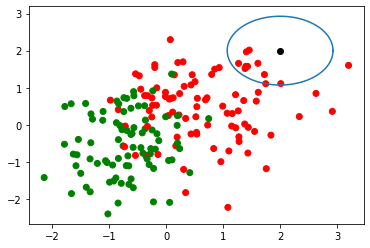

In [6]:
theta = np.linspace(0, 2*np.pi, 100)
r = max(knn["Distance"])
plt.plot(r*np.cos(theta)+2,r*np.sin(theta)+2) 
plt.scatter(x,y,c=df["diagnosis"].map({0:"green",1:"red"}))
plt.plot(2,2,"ko")
print(f"{sum(knn['diagnosis'])} malignos y {k-sum(knn['diagnosis'])} benignos")
print("Claramente es maligno")

#### Example 2

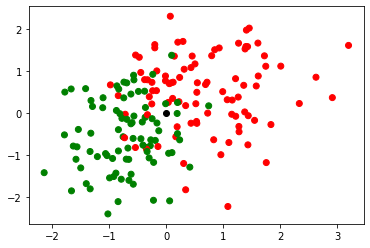

In [7]:
plt.scatter(x,y,c=df["diagnosis"].map({0:"green",1:"red"}))
plt.plot(0,0,"ko")

In [8]:
k=10
distances=pd.Series(((0-x)**2+(0-y)**2)**0.5,name="Distance")
knn=pd.concat([distances,df["diagnosis"]],axis=1).sort_values(by="Distance").iloc[:k,:]
knn.head(10)

,Distance,diagnosis
147,0.194477,0
112,0.214700,0
99,0.249196,1
93,0.283445,0
149,0.292607,0
165,0.314857,0
171,0.327053,1
47,0.330777,1
94,0.345952,1
16,0.359937,1


5 malignos y 5 benignos
No es tan claro si es benigno o no


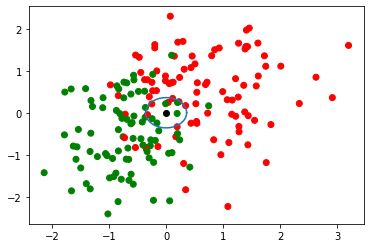

In [9]:
theta = np.linspace(0, 2*np.pi, 100)
r = max(knn["Distance"])
plt.plot(r*np.cos(theta)+0,r*np.sin(theta)+0) 
plt.scatter(x,y,c=df["diagnosis"].map({0:"green",1:"red"}))
plt.plot(0,0,"ko")
print(f"{sum(knn['diagnosis'])} malignos y {k-sum(knn['diagnosis'])} benignos")
print("No es tan claro si es benigno o no")